In [5]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [36]:
import plotly.express as px
z = main_df.corr()
fig = px.imshow(z, text_auto = True)
fig.show()
fig_h.show()

NameError: name 'fig_h' is not defined

fixed acidity quality    0.12197
Name: fixed acidity, dtype: float64


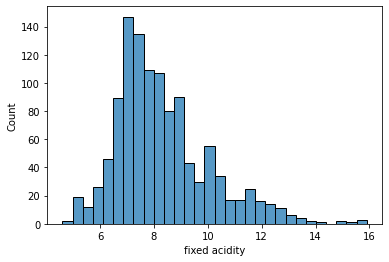

volatile acidity quality   -0.407394
Name: volatile acidity, dtype: float64


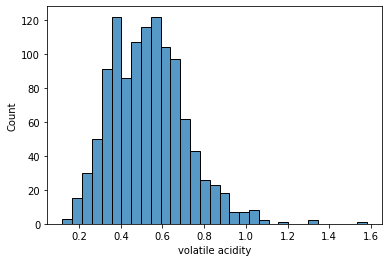

citric acid quality    0.240821
Name: citric acid, dtype: float64


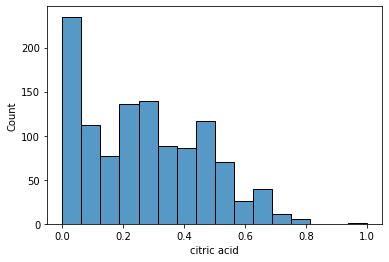

residual sugar quality    0.022002
Name: residual sugar, dtype: float64


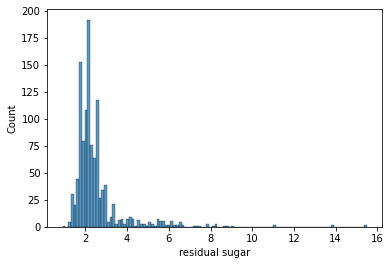

chlorides quality   -0.124085
Name: chlorides, dtype: float64


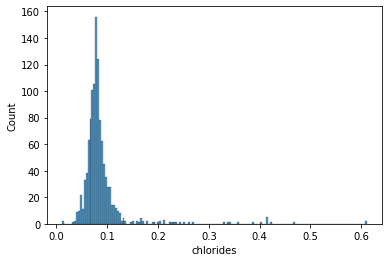

free sulfur dioxide quality   -0.06326
Name: free sulfur dioxide, dtype: float64


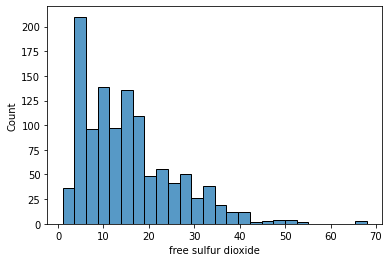

total sulfur dioxide quality   -0.183339
Name: total sulfur dioxide, dtype: float64


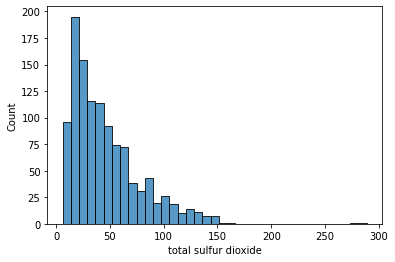

density quality   -0.175208
Name: density, dtype: float64


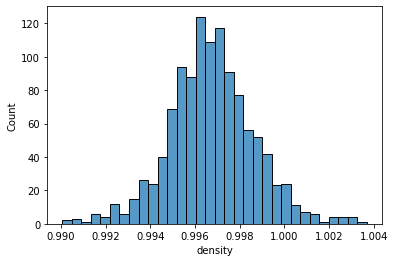

pH quality   -0.052453
Name: pH, dtype: float64


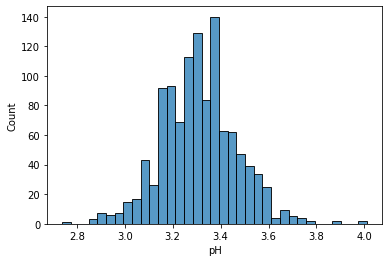

sulphates quality    0.25771
Name: sulphates, dtype: float64


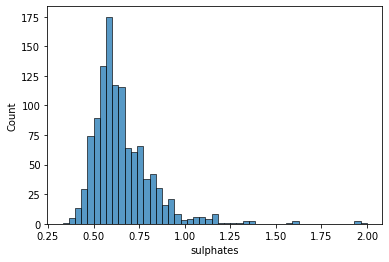

alcohol quality    0.484866
Name: alcohol, dtype: float64


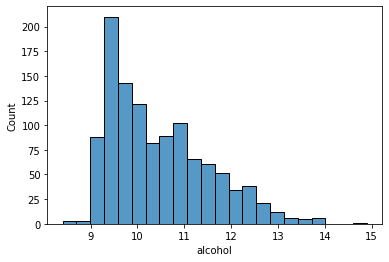

quality quality    1.0
Name: quality, dtype: float64


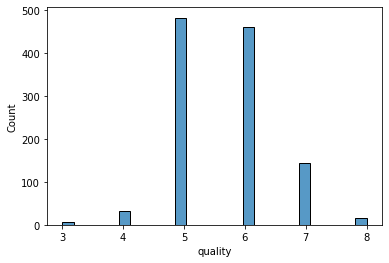

Id quality    0.069708
Name: Id, dtype: float64


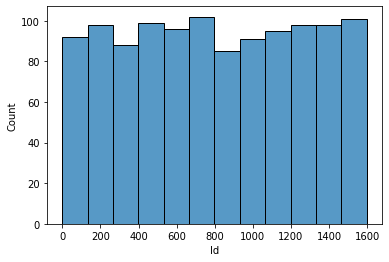

In [7]:
for i in range(len(quality_corr)):
    print(quality_corr.index[i], quality_corr.iloc[i])
    ax = sns.histplot(data=main_df, x=quality_corr.index[i])
    plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
list(main_df.columns)[:-1]

['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol']

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [60]:
main_df = pd.read_csv("../Resources/WineQT.csv")

# main_df.drop(columns = ['fixed acidity', "residual sugar", 'free sulfur dioxide', 'pH', 'Id'], inplace = True)
# main_df.drop(columns = ['citric acid','chlorides', 'density'], inplace = True)

y = main_df['quality']#.to_numpy().reshape(-1,1)
holder_list = []
for i in y:
    if 3 <= i <= 4:
        holder_list.append(1)
    elif 5 <= i <= 6:
        holder_list.append(2)
    elif 7 <= i <= 8:
        holder_list.append(3)

        
        
y = np.array(holder_list).reshape(-1,1)
X = main_df[list(main_df.columns[:-2])]

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)        


In [62]:
clf = LogisticRegression(multi_class = 'multinomial').fit(X_train, y_train)

C:\Users\dhlec\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [63]:
pred = clf.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test, pred)

0.8518518518518519

# Neural Network Building

In [49]:
import torch
# import plotly.graph_objects as go
import numpy as np

torch.manual_seed(0)

# Batch Size, Input Neurons, Hidden Neurons, Output Neurons
N, D_in, H, D_out = 1143, 4, 700000, 1

# Create random Tensors to hold inputs and outputs
x = torch.from_numpy(X).float()
y = torch.tensor(main_df['quality'].values).float()

# Use the nn package to define our model
# Linear (Input -> Hidden), ReLU (Non-linearity), Linear (Hidden-> Output)
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.ReLU(),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

# Define the loss function: Mean Squared Error
# The sum of the squares of the differences between prediction and ground truth
loss_fn = torch.nn.MSELoss(reduction='sum')

# The optimizer does a lot of the work of actually calculating gradients and
# applying backpropagation through the network to update weights
learning_rate =  0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Perform 30000 training steps
for t in range(30000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute loss and print it periodically
    loss = loss_fn(y_pred, y)
    if t % 100 == 0:
        print(t, loss.item())

    # Update the network weights using gradient of the loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



KeyboardInterrupt: 